In [14]:
import bk.load
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats
import scipy.signal
import matplotlib
import matplotlib.animation as animation
%matplotlib qt

In [2]:
import os

In [35]:
bk.load.current_session_linux()

lfp = bk.load.lfp(101,0,5000)

Rat : 8 on day : 6
Working with session Rat08-20130713 @ /home/billel/Data/GG-Dataset/Rat08/Rat08-20130713


In [36]:
states = bk.load.states()

In [40]:
lfp_sws = lfp.restrict(states['sws'])

In [41]:
f,p = scipy.signal.welch(lfp_sws.values,fs = 1250,nperseg=5000,noverlap=2500)

In [42]:
plt.plot(f,np.log(p))
plt.xlim([0,120])

(0.0, 120.0)

In [34]:
path = '/media/bistatesl/GGLab-01-BK/DATA/Rat08-20130713/'
os.chdir(path)
bk.load.path = path
bk.load.rat = 8
bk.load.session = 'Rat08-20130713'
bk.load.day = 6

FileNotFoundError: [Errno 2] No such file or directory: '/media/bistatesl/GGLab-01-BK/DATA/Rat08-20130713/'

In [16]:
jet = matplotlib.cm.get_cmap('jet')
viridis = matplotlib.cm.get_cmap('viridis')

cclor = list(np.linspace(0,255,30).astype('uint16'))

In [17]:
def init():
    for j in range(lfp.shape[1]):
        plt.plot(lfp.as_units('s').index,
             scipy.stats.zscore(lfp.values[:,j],0)-5*j,
             c = viridis(cclor[j]))
def animate(i):
    dt = 20
    t = lfp.as_units('s').index[i*dt]
    plt.xlim(t-1,t+1)

In [18]:
def init():
    plt.plot(lfp.as_units('s').index, lfp.values, c = '#003f52')
def animate(i):
    dt = 400
    t = lfp.as_units('s').index[i*dt]
    plt.xlim(t-10,t)

In [19]:
fig = plt.figure(figsize = (24,4))

anim = animation.FuncAnimation(fig,animate, init_func = init, frames =  50*50)
anim.save('animation.mp4',fps = 50,dpi = 300)

In [339]:
# for i in range(a.shape[1]):
#     plt.plot(a.as_units('s').index,scipy.stats.zscore(a.values[:,i],0)-5*i,c = viridis(cclor[i*5]))

# plt.xlim(a.as_units('s').index[0]-1,a.as_units('s').index[0]+1)

# t0 = a.as_units('s').index[0]
# dt = 1/250
# t=t0

# for i in range(60*30):
#     t = t+dt
#     plt.xlim(t-1,t+1)
#     plt.pause(1/250)

KeyboardInterrupt: 

In [9]:
import scipy.signal

In [10]:
from scipy.io.wavfile import write

In [11]:
states = bk.load.states()
ripples = bk.load.ripples()
lfp = bk.load.lfp(1450,1500,166,13,dat = True, frequency=20000)

In [17]:
write('spikes.wav',20000,lfp.values)

In [7]:
ripples['peak'].as_units('s')

Time (s)
1449.120800    NaN
1449.408800    NaN
1449.535200    NaN
1450.368800    NaN
1451.474399    NaN
                ..
21830.460800   NaN
21837.103199   NaN
21839.475200   NaN
21839.888000   NaN
21841.255200   NaN
Length: 5808, dtype: float64

In [13]:
plt.plot(lfp.as_units('s'))
for i in ripples['peak'].as_units('s').index.values:
    if i<1500: plt.axvline(i,color = 'red')

In [23]:
%matplotlib inline

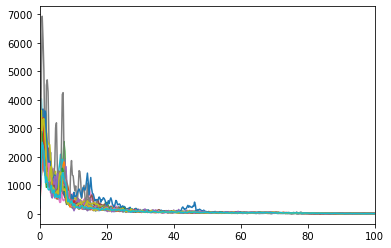

In [145]:
lfps = []
psds = np.zeros_like(psd)
for j in states['Rem'].as_units('s').iloc:
    lfps.append(bk.load.lfp(j.start,j.end,166,105))

for l in lfps:
    freq, psd = scipy.signal.welch(l.values,1250,nperseg=5000,noverlap=4000,scaling='spectrum')
    psds = np.vstack((psds,psd))
    plt.plot(freq,psd)
    plt.xlim([0,100])

In [140]:
print(psds[:,0])

[    0.        348.51514   421.09552   395.4497    216.00653   561.45465
   521.02246   381.39722   597.64984   663.60114   523.5202    414.47223
   467.62607   267.157     599.6265   1927.3938  12726.104     524.0973
   339.68405   417.2465    321.2167    317.1439    287.64294   632.1909
   524.7188    229.80661   451.57574   429.28107   373.67883   523.546
   265.13794]


In [177]:
%matplotlib qt

In [178]:
a = np.mean(psds,0)
v = np.var(psds,0)

In [179]:
plt.plot(freq,(np.log(a)-v)/(v**2))
plt.xlim([0,100])


(0.0, 100.0)

/home/billel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


(0.0, 10.0)

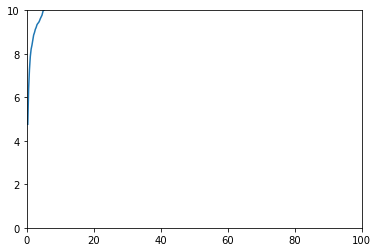

In [152]:
plt.plot(freq,np.log(np.mean(psds,0)*freq**2))
plt.xlim([0,100])
plt.ylim(0,10)

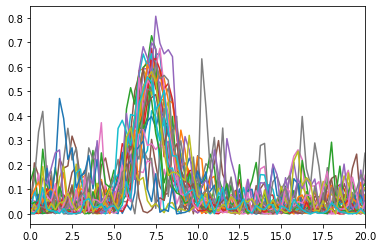

In [74]:
stru = ['Hpc','BLA']
electrodes = [23,150]
lfps = {}
cohe = np.zeros_like(coh)
for j in states['Rem'].as_units('s').iloc:
    for s,e in zip(stru,electrodes):
        lfps.update({s:bk.load.lfp(j.start,j.end,166,e)})
    freq,coh = scipy.signal.coherence(lfps[stru[0]].values,lfps[stru[1]].values,fs = 1250,nperseg = 5000,noverlap = 4500)
    cohe = np.vstack((cohe,coh))
    plt.plot(freq,coh)
    plt.xlim([0,20])

(0.0, 20.0)

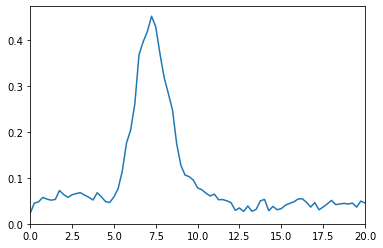

In [45]:
plt.plot(freq,np.mean(cohe,0))
plt.xlim([0,20])

In [9]:
power,phase = hilbert(filt)
# m = []
# for s in states['Rem'].iloc():
#     inter = nts.IntervalSet(s.start,s.end)
#     m.append(np.mean(power.restrict(inter)))
    
# plt.plot(m)

In [16]:
%matplotlib qt

In [11]:
s = plt.subplot(3,1,1)
plt.plot(lfp.index,lfp.values-np.mean(lfp.values),alpha = 0.5)
plt.plot(filt)
plt.subplot(3,1,2,sharex = s)
plt.plot(phase)
plt.subplot(3,1,3,sharex = s)
plt.plot(power,alpha = 0.5)
plt.plot(nts_smooth(power,1250,125))

In [17]:
s = plt.subplot(1,2,1)
lfp_hpc = lfp_in_intervals(166,13,states['Rem'])
lfp_bla = lfp_in_intervals(166,105,states['Rem'])

filt_hpc = bk.signal.passband(lfp_hpc,4,8)
filt_bla = bk.signal.passband(lfp_bla,4,8)

power_hpc,phase_hpc = hilbert(filt_hpc)
power_bla,phase_bla = hilbert(filt_bla)
plt.hist2d(np.log(nts_smooth(power_hpc,1250,125).values),np.log(nts_smooth(power_bla,1250,125).values),100)

plt.subplot(1,2,2)
lfp_hpc = lfp_in_intervals(166,13,states['sws'])
lfp_bla = lfp_in_intervals(166,105,states['sws'])

filt_hpc = bk.signal.passband(lfp_hpc,4,8)
filt_bla = bk.signal.passband(lfp_bla,4,8)

power_hpc,phase_hpc = hilbert(filt_hpc)
power_bla,phase_bla = hilbert(filt_bla)
plt.hist2d(np.log(nts_smooth(power_hpc,1250,125).values),np.log(nts_smooth(power_bla,1250,125).values),100)


(array([[  0.,   0.,   0., ...,   0.,   0.,   0.],
        [  0.,   0.,   0., ...,   0.,   0.,   0.],
        [  0.,   0.,   0., ...,   0.,   0.,   0.],
        ...,
        [  0.,   0.,   0., ...,  27.,   9.,   0.],
        [  0.,   0.,   0., ...,  12.,  39.,  10.],
        [  0.,   0.,   0., ...,   0.,  12., 135.]]),
 array([ 6.16279858,  6.25702022,  6.35124186,  6.4454635 ,  6.53968514,
         6.63390678,  6.72812842,  6.82235006,  6.9165717 ,  7.01079334,
         7.10501498,  7.19923662,  7.29345826,  7.3876799 ,  7.48190154,
         7.57612318,  7.67034482,  7.76456646,  7.8587881 ,  7.95300974,
         8.04723138,  8.14145302,  8.23567466,  8.3298963 ,  8.42411794,
         8.51833958,  8.61256122,  8.70678286,  8.8010045 ,  8.89522613,
         8.98944777,  9.08366941,  9.17789105,  9.27211269,  9.36633433,
         9.46055597,  9.55477761,  9.64899925,  9.74322089,  9.83744253,
         9.93166417, 10.02588581, 10.12010745, 10.21432909, 10.30855073,
        10.40277237, 1

In [49]:
x = np.linspace(-2,15)
y = 0.128041*x+7.8479

In [52]:
a.pvalue

0.0

In [108]:
import matplotlib as mpl

ERROR! Session/line number was not unique in database. History logging moved to new session 691


In [3]:
bk.load.current_session()

Rat : 8 on day : 6
Working with session Rat08-20130713 @ Z:\Rat08\Rat08-20130713


True

In [12]:
lfp = bk.load.lfp(1000,2500,166,13)

In [14]:
plt.plot(lfp.as_units('s'))

In [6]:
states = bk.load.states()

In [7]:
lfp_nrem = lfp.restrict(states['sws'])

In [9]:
plt.plot(lfp_nrem)

In [11]:
plt.plot(lfp_nrem.times())

In [12]:
import basefunction.vBaseFunctions3 as vbf
import bk.load
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal
import bk.plot

In [13]:
bk.load.current_session_linux()
chan = bk.load.random_channel('BLA')
# chan = 23

lfp = bk.load.lfp(chan,1448,1455)
# lfp_state = lfp.as_units('s').loc[1448:1448+10]
f_wv = pow(2,np.linspace(np.log2(1),np.log2(300),100))
output = vbf.wvSpect(lfp.values,f_wv)[0]

Rat : 8 on day : 6
Working with session Rat08-20130713 @ /home/billel/Data/GG-Dataset/Rat08/Rat08-20130713


<ipython-input-22-6dfdfed88c21>:2: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolormesh(lfp.index,f_wv,output)


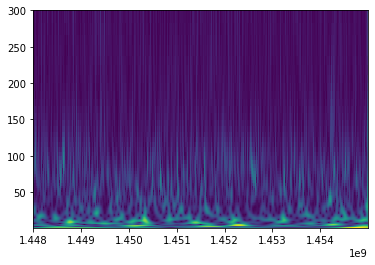

In [22]:
fig,ax = plt.subplots(1,1)
ax.pcolormesh(lfp.index,f_wv,output)

<ipython-input-20-860431e32f7a>:1: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolormesh(lfp.index,f_wv,output)


In [ ]:
##### def plot_state(states,ax,colors = None):
    if colors is None:
#         colors = {'sws' : '#D1D9D9','Rem' : '#F29191','wake' : '#94D0CC','drowsy' : '#E8E46E'}
        colors = {'sws' : 'grey','Rem' : 'orange','wake' : 'green','drowsy' : 'white'}

    
    for k,i in states.items():
        plt.sca(ax)
        bk.plot.intervals(i,colors[k])

In [48]:
states = bk.load.states()

In [53]:
%matplotlib qt 
f,t,y = scipy.signal.spectrogram(lfp.values,fs = 1250,nperseg=5000,noverlap=0)

fig,axs = plt.subplots(3,1,sharex='all')
axs[0].plot(lfp.as_units('s'))
axs[1].pcolormesh(t+lfp.as_units('s').index[0],f,np.log(y),shading = 'gouraud',vmin = 0,vmax = 12,rasterized = True)
axs[1].set_ylim([0,100])
axs[2].pcolormesh(lfp.as_units('s').index,f_wv,output,shading = 'gouraud',rasterized = True,vmin = 50,vmax = 150)
plt.xlim([1448,1460])
plot_state(states,axs[0])

In [63]:
%matplotlib qt

In [11]:
fig,axs = plt.subplots(2,1,sharex= 'all')
axs[0].plot(lfp_state)
axs[1].pcolormesh(lfp_state.index,f_wv,output,rasterized = True)

NameError: name 'plt' is not defined

In [1]:
import bk.plot
import bk.signal
import bk.load

Rat : 8 on day : 6
Working with session Rat08-20130713 @ /home/billel/Data/GG-Dataset/Rat08/Rat08-20130713


/mnt/icybox/Python/Billel/bk/plot.py:44: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolormesh(t,f,spec)


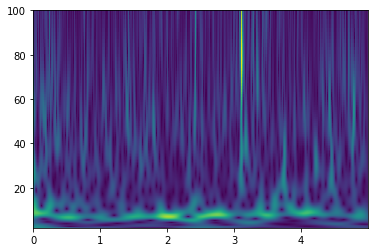

In [2]:
bk.load.current_session_linux()
chan = 23
lfp = bk.load.lfp(chan,0,5)
t,f,spec = bk.signal.wavelet_spectrogram(lfp,2,100,200)
bk.plot.spectrogram(t,f,spec)

ValueError: too many values to unpack (expected 2)

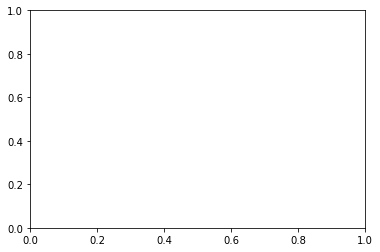